# Importing Necessaary Libraries

In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.cluster import KMeans

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Analysis and EDA

## Checking for null values

In [4]:
data[['horsepower']] = data[['horsepower']].replace("?", np.nan)

In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data.horsepower = pd.to_numeric(data.horsepower)
data[['horsepower']] = data[['horsepower']].replace(np.nan, data.horsepower.median())

In [7]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Count of Cars of Each Year

In [8]:
data["model year"].value_counts().sort_values(ascending=False)

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64

#### We have maximum cars from 1973 followed by 1978, 1976, and so on.

## Count Plot for Number of Cylinders and Different Origins

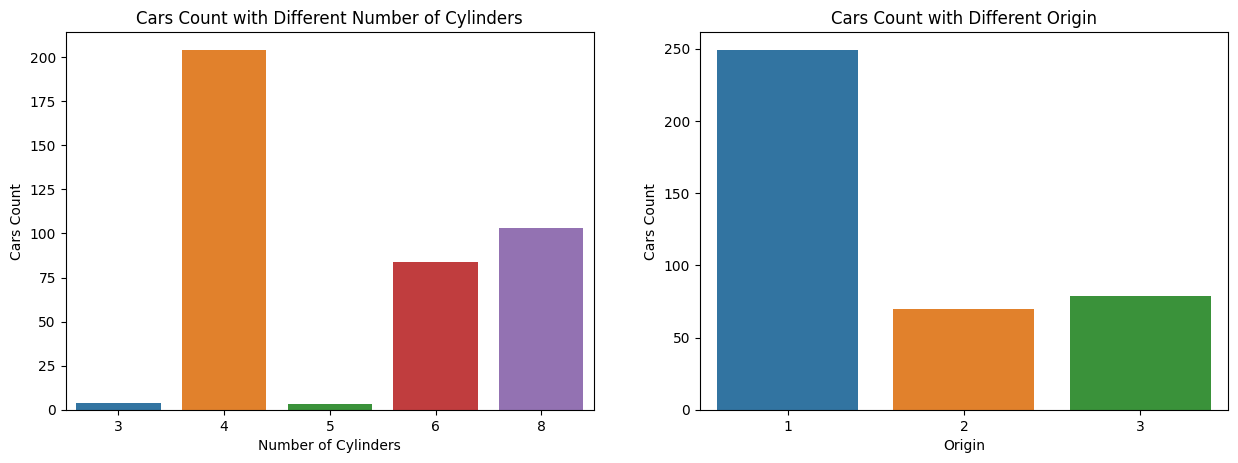

In [9]:
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, dpi=100)

sns.countplot(x="cylinders", data=data, ax=axes[0])
axes[0].set_title("Cars Count with Different Number of Cylinders")
axes[0].set_ylabel("Cars Count")
axes[0].set_xlabel("Number of Cylinders")

sns.countplot(x="origin", data=data, ax=axes[1])
axes[1].set_title("Cars Count with Different Origin")
axes[1].set_ylabel("Cars Count")
axes[1].set_xlabel("Origin")

plt.show()

#### Most of the Cars have 4 Cylinders
#### Also Most of the Cars are from Origin 1

## Effect of Cylinder Count on Mileage, Acceleration, Horsepower

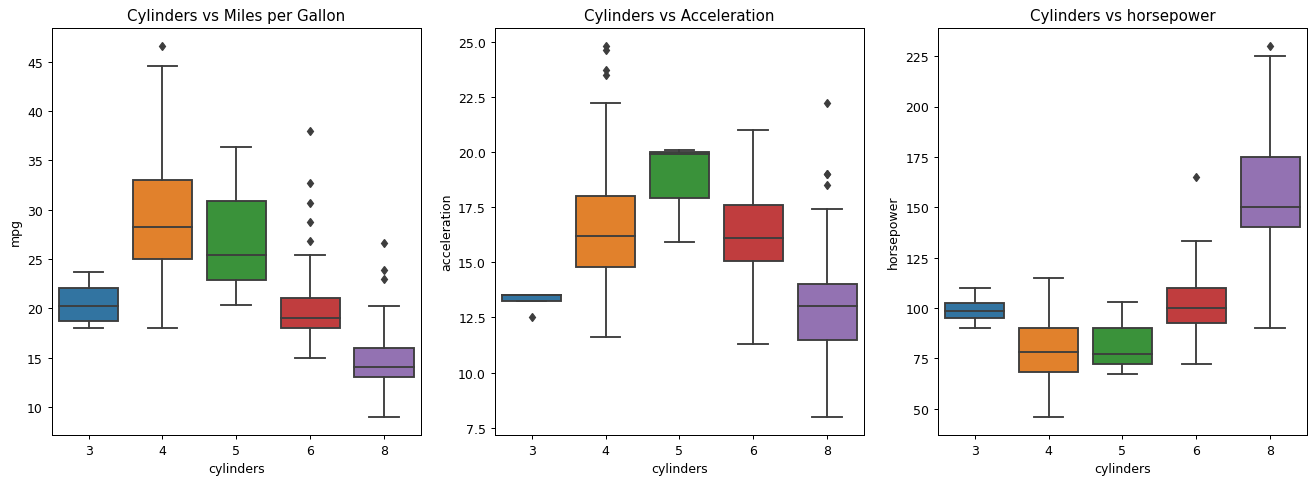

In [10]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.boxplot(x="cylinders", y="mpg", data=data, ax=axes[0])
axes[0].set_title("Cylinders vs Miles per Gallon")

sns.boxplot(x="cylinders", y="acceleration", data=data, ax=axes[1])
axes[1].set_title("Cylinders vs Acceleration")

sns.boxplot(x="cylinders", y="horsepower", data=data, ax=axes[2])
axes[2].set_title("Cylinders vs horsepower")

plt.show()

#### Cars with 4 Cylinders have highest mileage
#### Cars with 5 Cylinders have highest acceleration
#### 8 Cylinder cars have higher Horsepower

## Effect of Weight Count on Mileage, Acceleration, Displacement

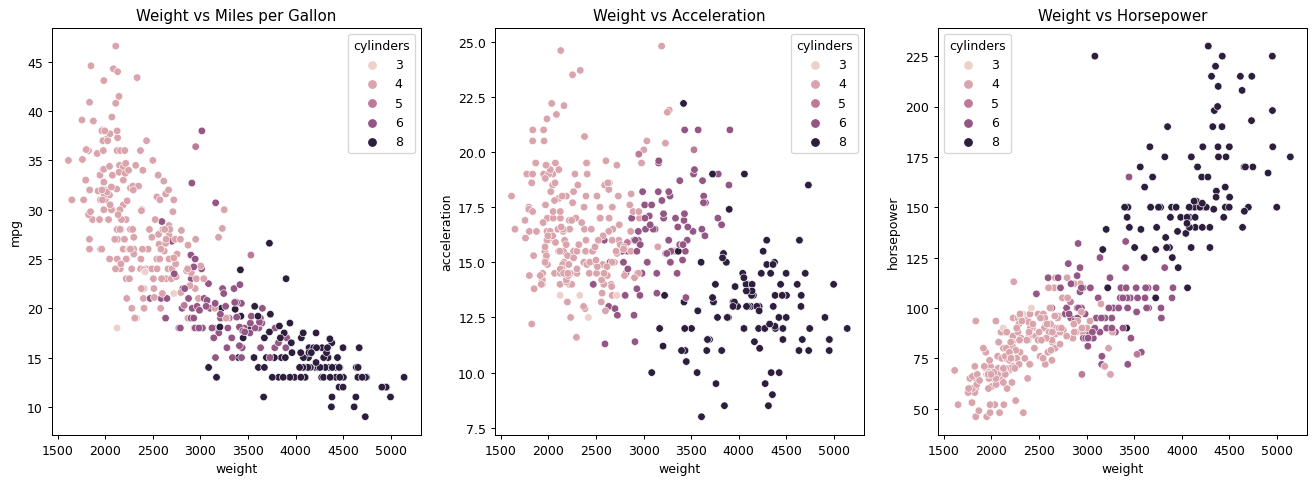

In [11]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=data, hue="cylinders", ax=axes[0])
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=data, hue="cylinders", ax=axes[1])
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=data, hue="cylinders", ax=axes[2])
axes[2].set_title("Weight vs Horsepower")

plt.show()

#### Higher Weight has Lower Mileage
#### Higher Weight has Slower Acceleration
#### Heavier Cars have Higher Horsepower

## Distributon Plots for Continious Features

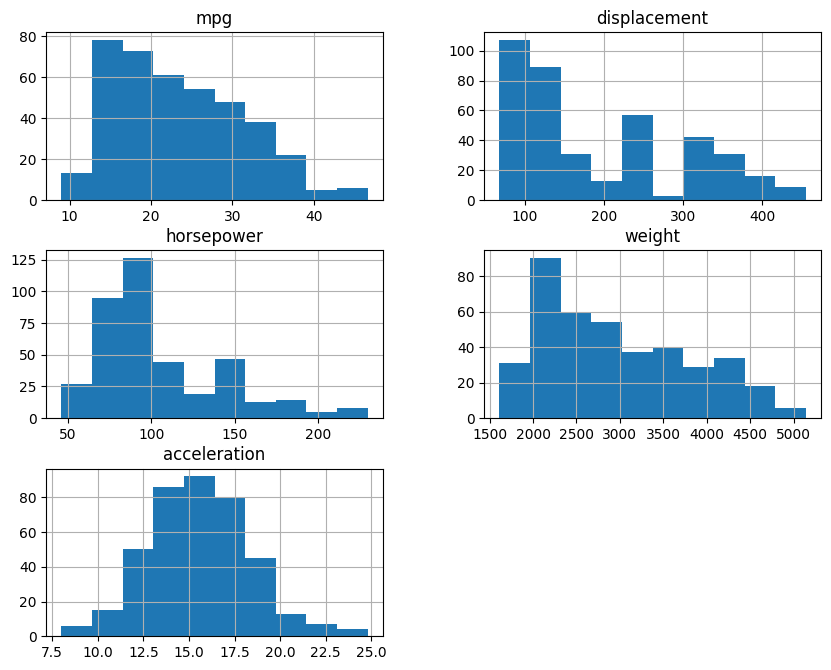

In [12]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (10, 8)
data[["mpg", "displacement", "horsepower", "weight", "acceleration"]].hist()
plt.show()

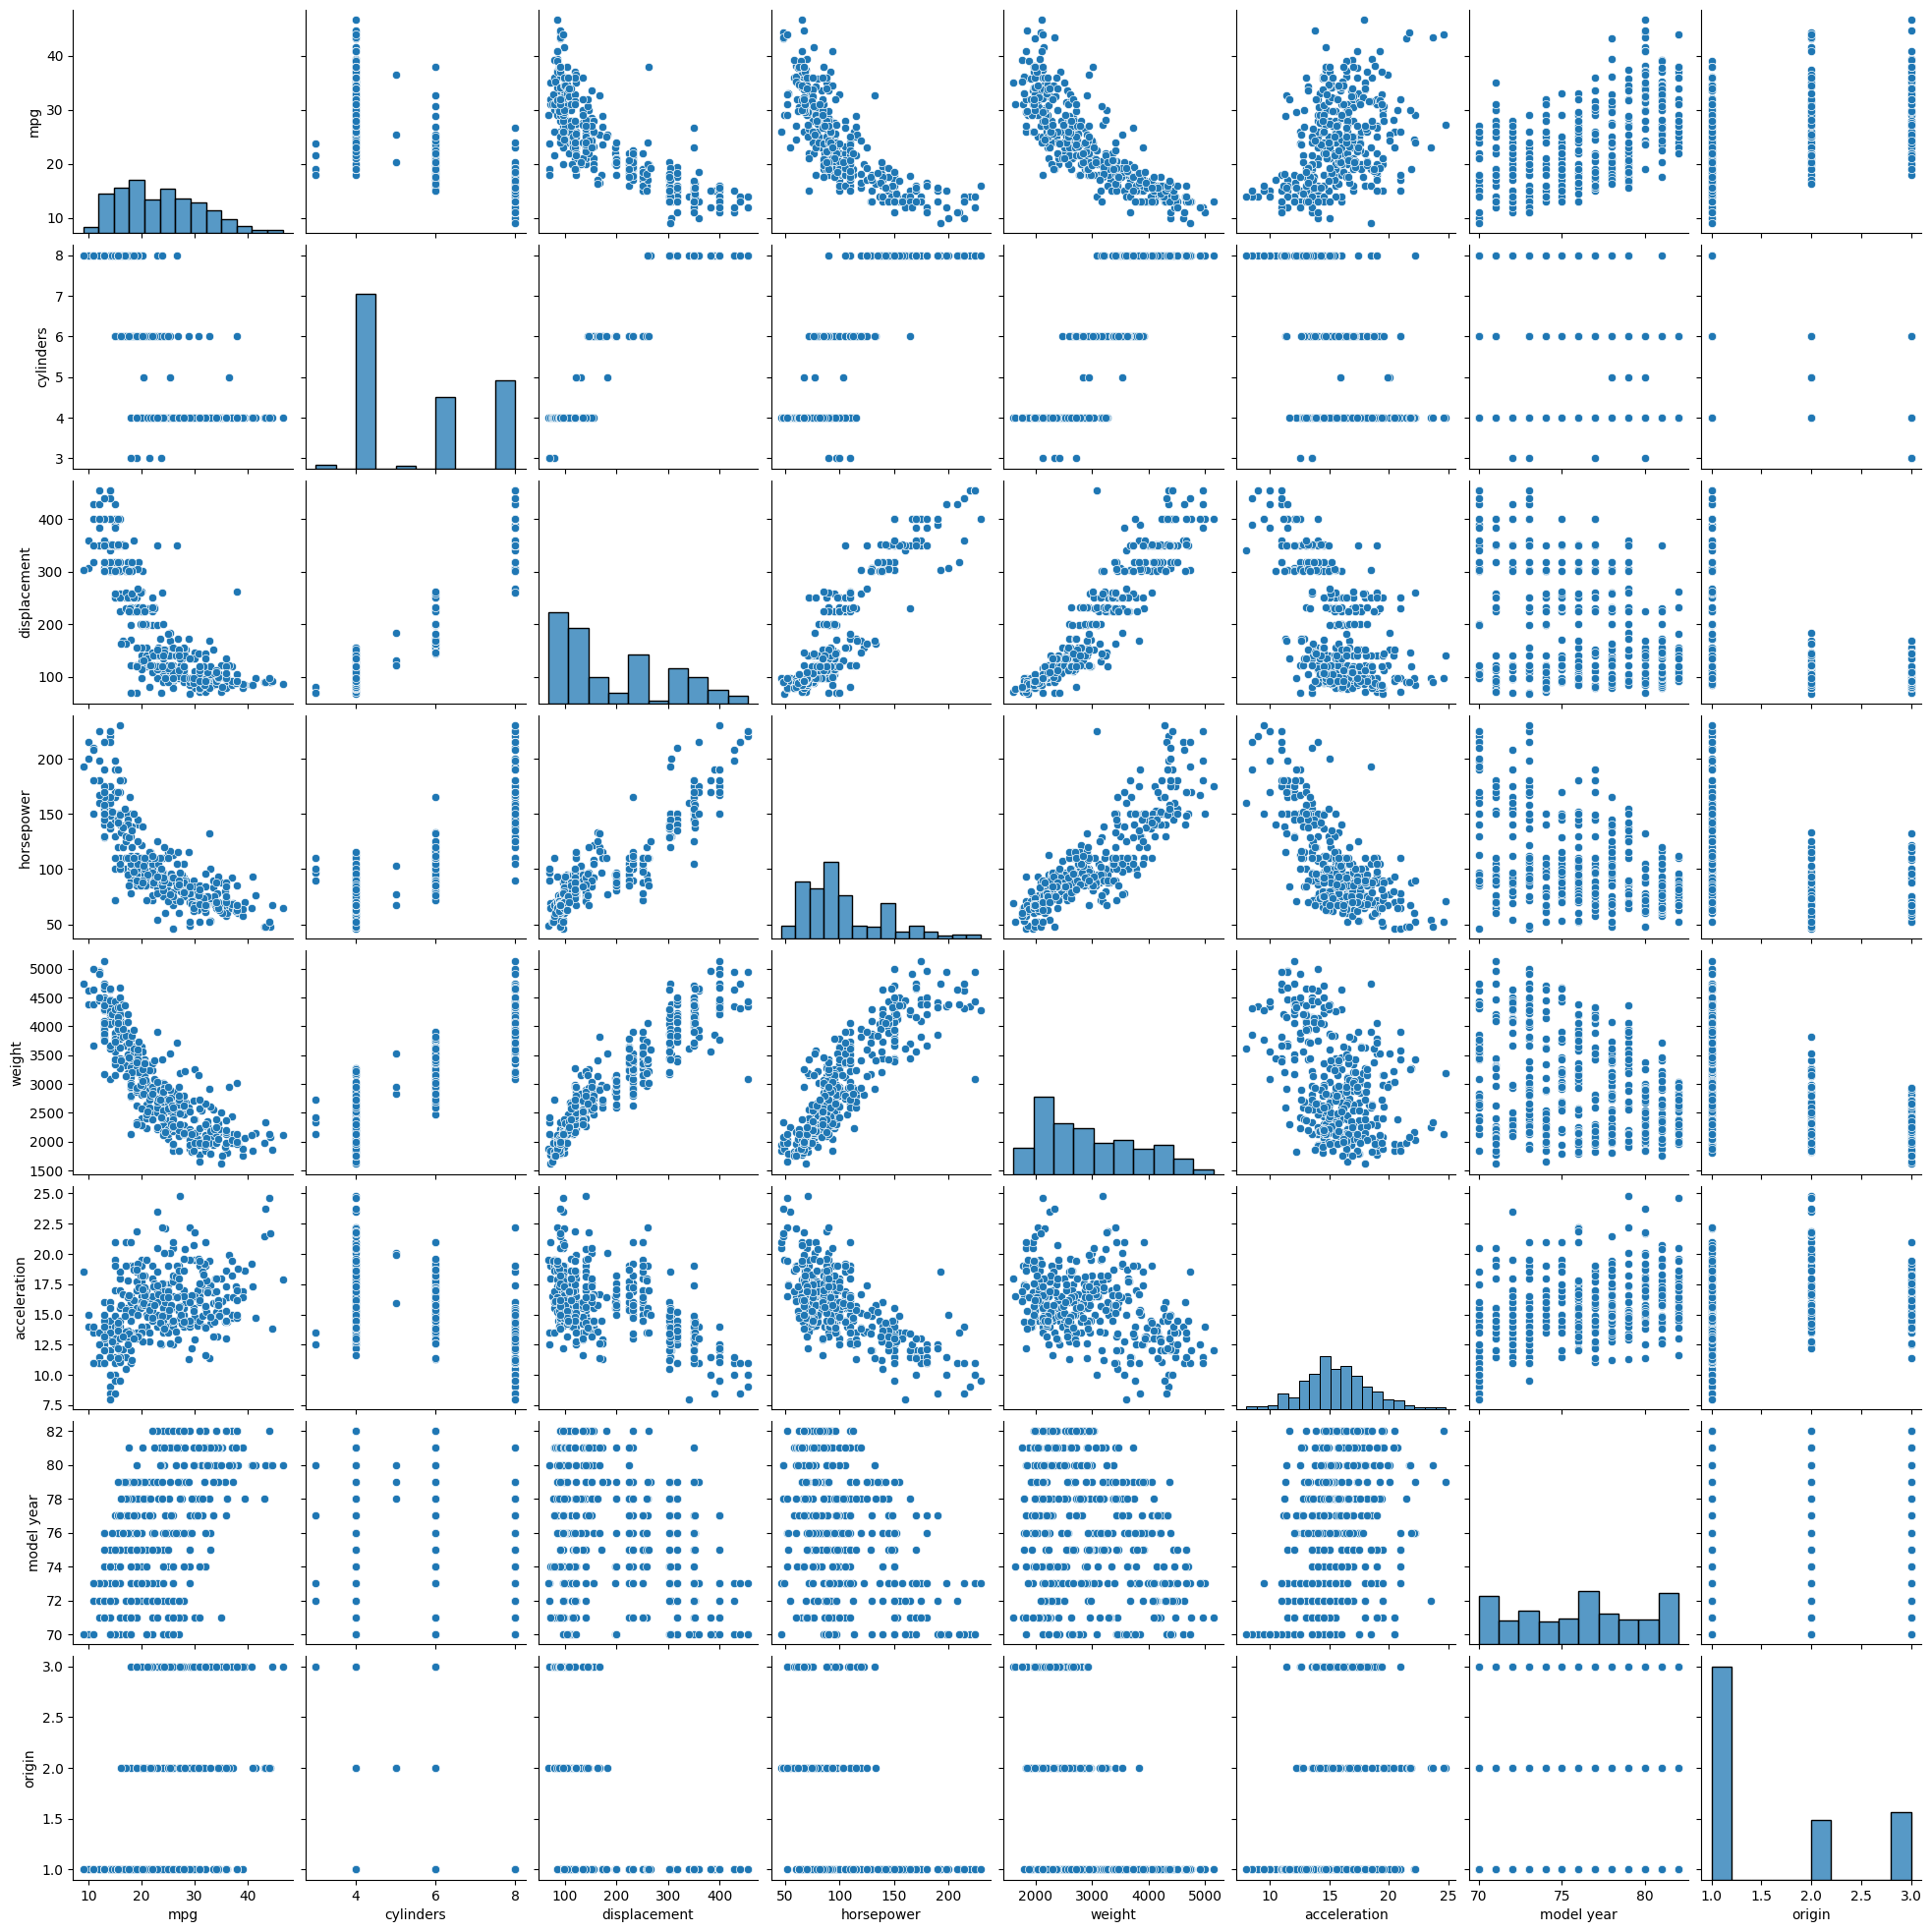

In [13]:
sns.pairplot(data)
plt.show()

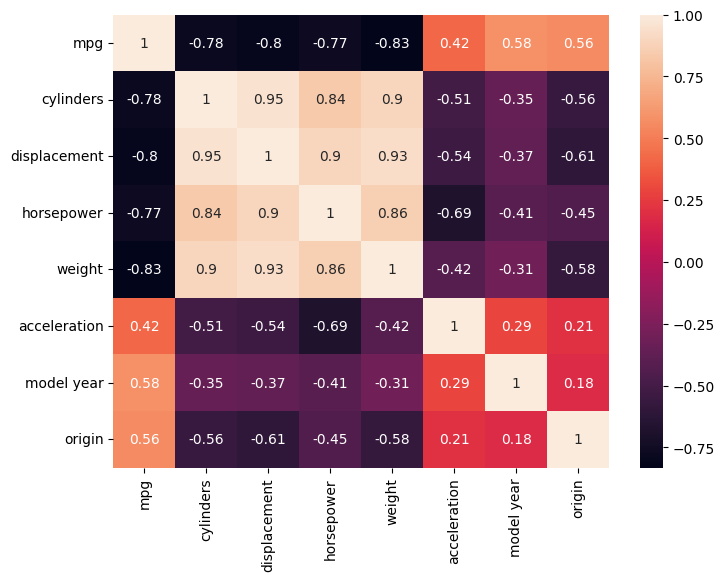

In [14]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature Engineering

In [15]:
car_company = []
for car_name in data["car name"]:
    car_name = car_name.split(" ")
    car_company.append(car_name[0])

In [16]:
data["car company"] = car_company
data.drop("car name", inplace=True, axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


## Encoding Categorical Variable - Car Company

In [17]:
le = LabelEncoder()
data["car company"] = le.fit_transform(data["car company"])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car company
0,18.0,8,307.0,130.0,3504,12.0,70,1,7
1,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,25
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,13


# Preparing Data

## Feature Scaling using StandardScaler

In [18]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data.copy())

## Applying Principal Compnent Analysis

In [19]:
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)

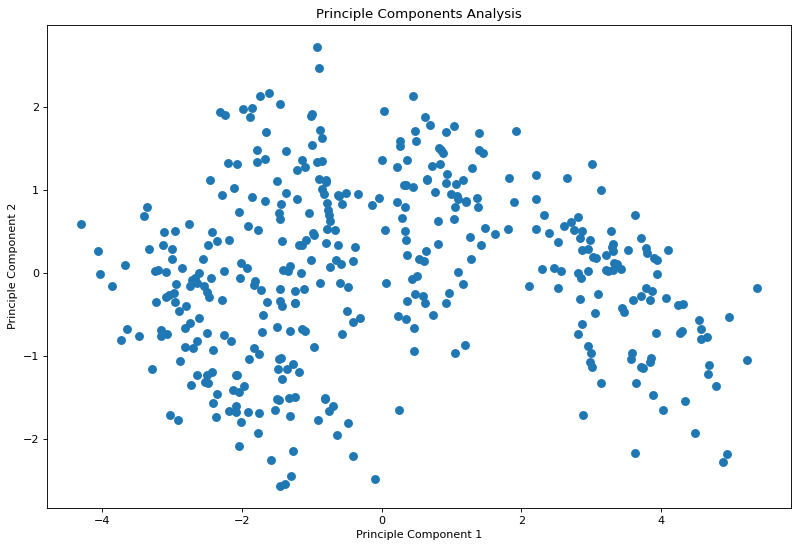

In [20]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

# KMeans Model

## Using Elbow Method to Find Appropriate number of clusters

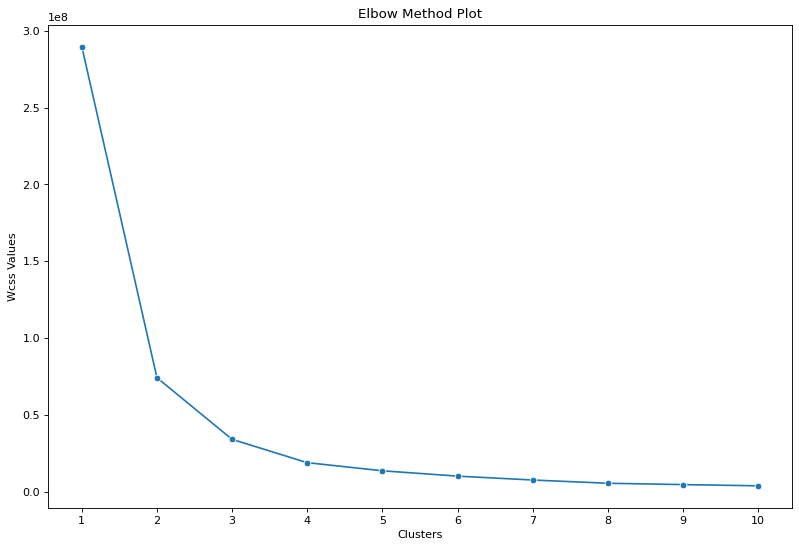

In [21]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42
    )
    kmeans.fit(data)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(1, 11))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

### From Elbow Method it is Clear that we have 3 Clusters

## Generating Our Clusters using Kmeans

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(scaled_data))
y_kmeans

0      1
1      1
2      1
3      1
4      1
      ..
393    2
394    0
395    2
396    2
397    2
Length: 398, dtype: int32

In [23]:
y_kmeans.value_counts()

0    149
2    149
1    100
dtype: int64

## Centeroids

In [24]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualizing Clusters

In [25]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = y_kmeans
pca_dataframe.sample(10)

,PCA 1,PCA 2,Cluster
328,-2.110640,1.026885,0
283,0.454754,2.131493,2
108,-1.908270,-1.678166,0
40,3.465330,-0.473588,1
1,3.717417,-0.277607,1
293,-2.474984,-1.325987,0
127,0.936636,1.186961,2
386,0.029713,1.956701,2
15,0.465962,-0.943504,2
59,-2.499210,-0.721249,0


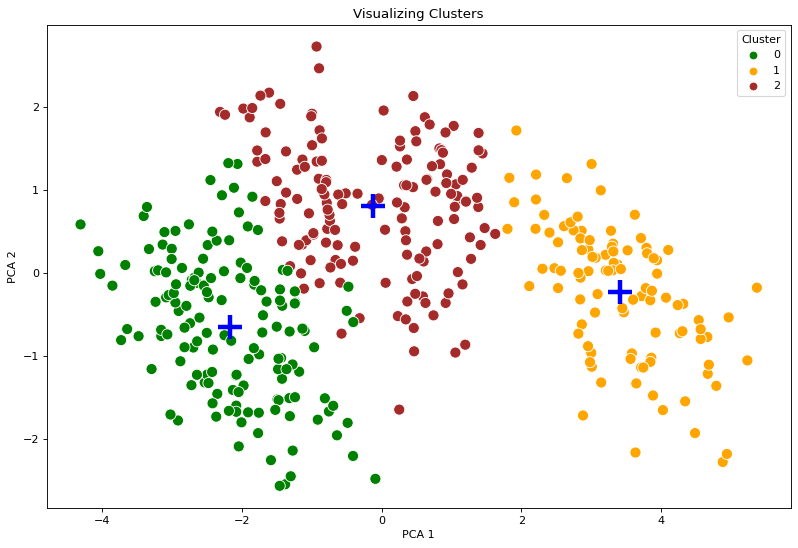

In [26]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, palette=['green','orange','brown'], s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [27]:
data["Cluster"] = y_kmeans
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car company,Cluster
0,18.0,8,307.0,130.0,3504,12.0,70,1,7,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,3,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,25,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,13,1


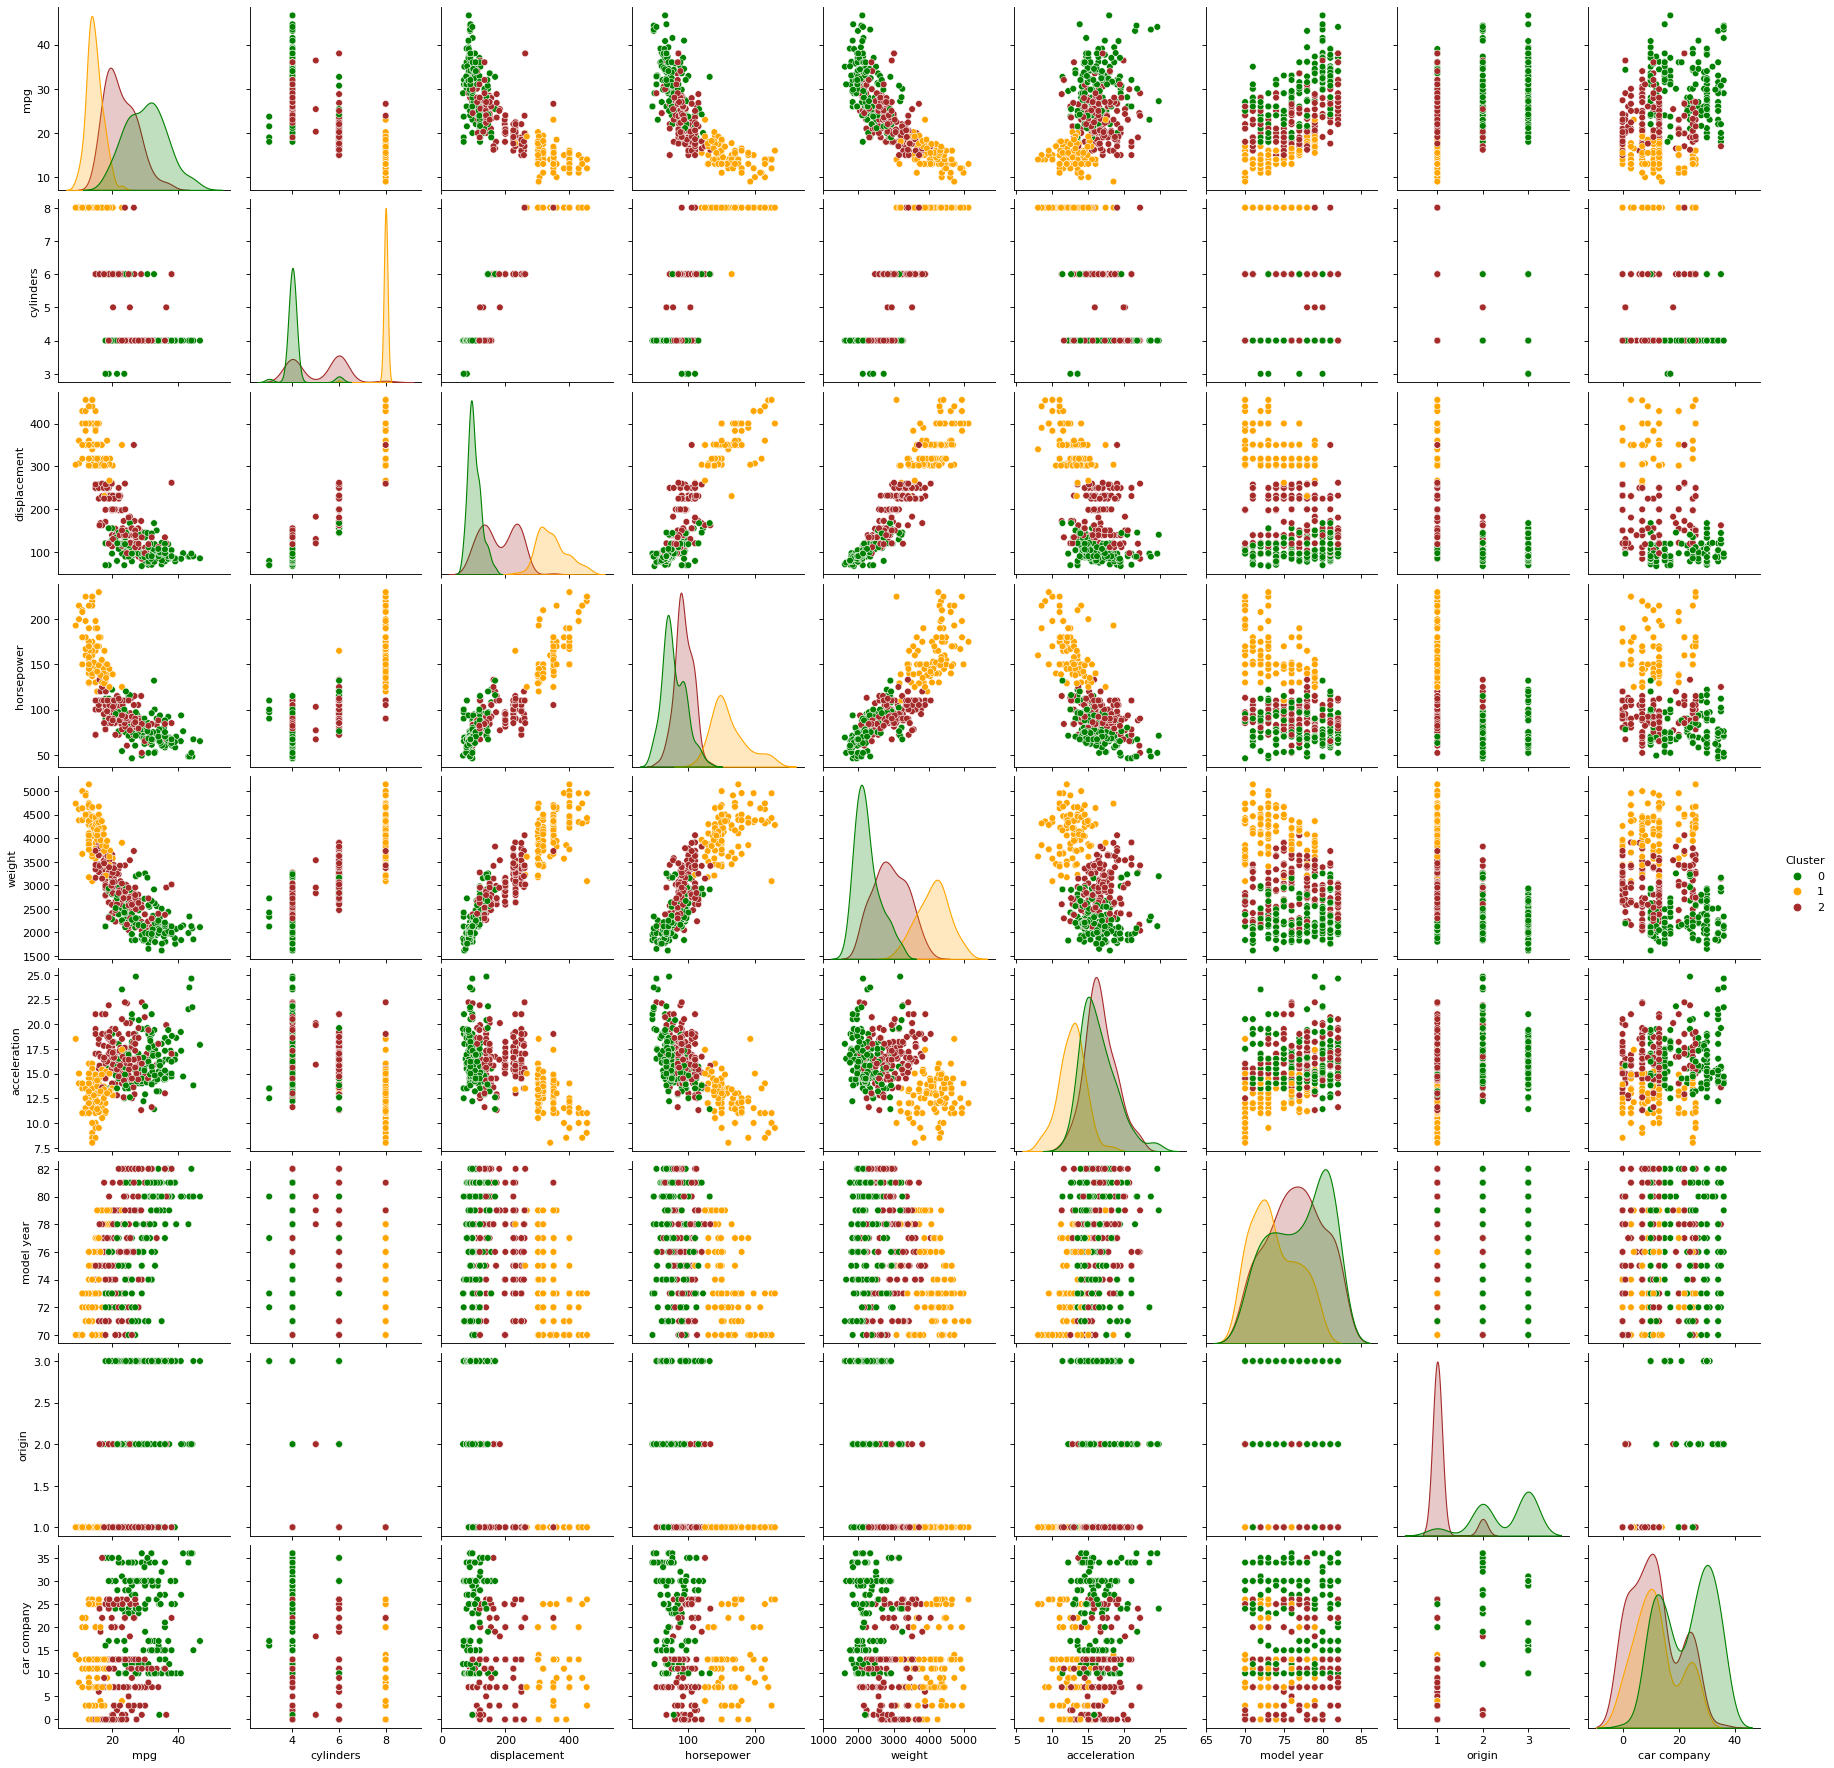

In [28]:
sns.pairplot(data, hue="Cluster", palette=['green','orange','brown'])
plt.show()

# Classification

## Preparing Data for Classification Model

In [29]:
X = data.drop("Cluster", axis=1).values
y = data.Cluster

## Splitting Data into Training and Testing Set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling for Logistic Regression and LinearSVC

In [31]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Machine Learning - Multiple Model Testing

### Dataframe to store all the accuracy scores for Comparison and Analysis

In [32]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [33]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(eval_metric="logloss", use_label_encoder=False),
    CatBoostClassifier(silent=True)  
    ]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
GaussianProcessClassifier Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
SVC Done
NuSVC Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
LinearDiscriminantAnalysis Done
QuadraticDiscriminantAnalysis Done
XGBClassifier Done
CatBoostClassifier Done


In [34]:
# Scaled Data Used Here
MLA = [    
    #GLM
    linear_model.LogisticRegressionCV(),
    
    #SVM
    svm.LinearSVC(max_iter=10000), 
]
MLA_testing(MLA=MLA, X_test=X_test_scaled, X_train=X_train_scaled)

LogisticRegressionCV Done
LinearSVC Done


# Comparing Models

## Top 10 Best Performing Models

In [35]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)[:10]
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,LogisticRegressionCV,100.00,98.417339
1,LinearSVC,98.75,96.844758
2,XGBClassifier,97.50,94.959677
3,DecisionTreeClassifier,97.50,95.584677
4,CatBoostClassifier,97.50,97.167339
5,RandomForestClassifier,97.50,96.844758
6,GradientBoostingClassifier,97.50,95.907258
7,ExtraTreesClassifier,96.25,97.147177
8,LinearDiscriminantAnalysis,95.00,95.917339
9,RidgeClassifierCV,93.75,91.502016


#### LogisticRegressionCV Performed the Best with 100% Accuracy and 98.4% CrossVal-Accuracy

# Classification Using LogisticRegressionCV

In [36]:
classifier = linear_model.LogisticRegressionCV()
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

Test Accuracy :  100.0 % 

Confusion Matrix 
 [[29  0  0]
 [ 0 20  0]
 [ 0  0 31]] 



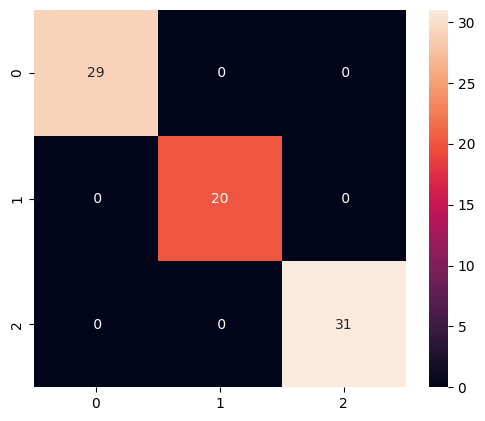

In [37]:
print("Test Accuracy : ", accuracy*100, "%", "\n")

print("Confusion Matrix \n", cm, "\n")

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["figure.dpi"] = (100)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f')
plt.show()